In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from fcmeans import FCM
import matplotlib as mpl
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.ticker import FixedLocator
from matplotlib.ticker import FixedFormatter
from sklearn.metrics import silhouette_samples
from sklearn.manifold import TSNE

from seaborn import scatterplot as scatter
from sklearn.metrics import silhouette_score
from pandas.plotting import register_matplotlib_converters

sns.set()
register_matplotlib_converters()
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X=iris.data


<Axes: >

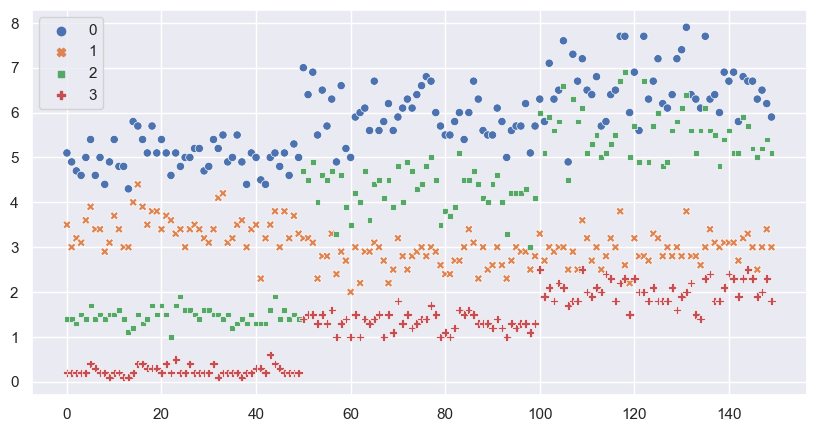

In [3]:
plt.figure(figsize=(10, 5))
scatter(X)

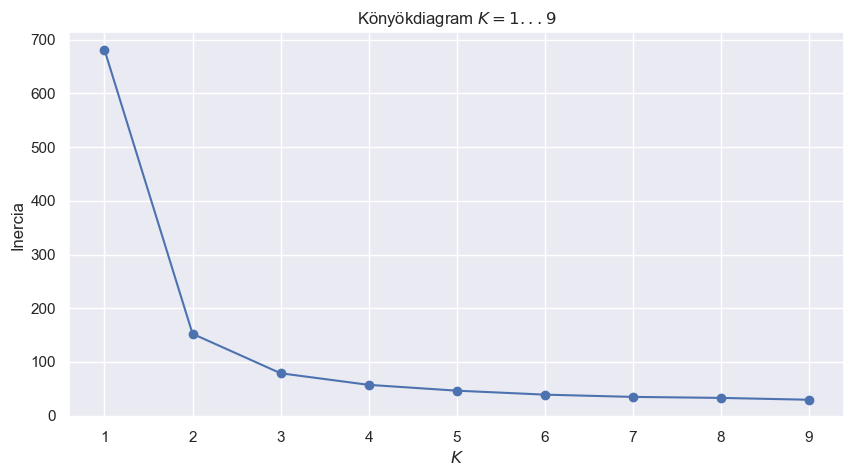

In [4]:
kmeans_per_k = [KMeans(
    n_clusters = k, 
    init = 'k-means++', 
    n_init = 1, 
    random_state = 42
    ).fit(X) for k in range(1,10)]

inertia = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(10, 5))
plt.title("Könyökdiagram $K=1...9$")
plt.plot(range(1, len(inertia) + 1), inertia, 'bo-')
plt.xlabel('$K$')
plt.ylabel('Inercia')
plt.show()

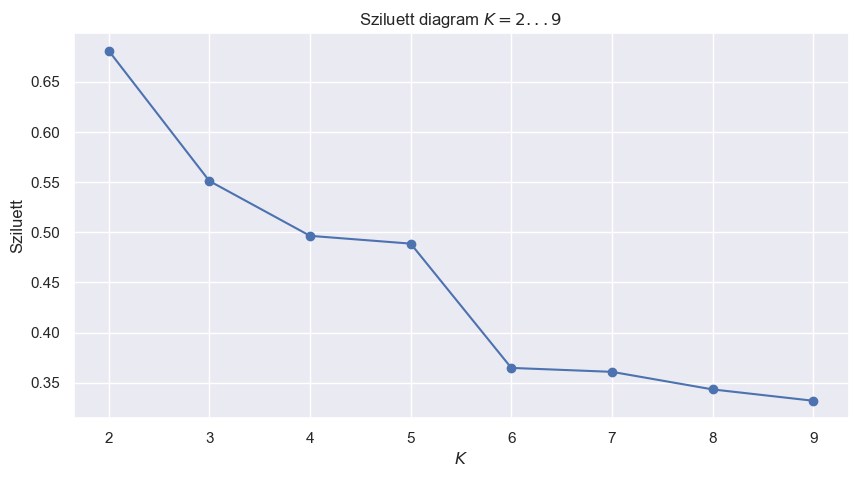

In [5]:
silhouettes = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(10, 5))
plt.title("Sziluett diagram $K=2...9$")
plt.plot(range(2,10), silhouettes, 'bo-')
plt.xlabel('$K$')
plt.ylabel('Sziluett')
plt.show()

Az inercia azt mutatja meg ohgy mennyire különülnek el a klaszterek, a diagram allapján a 3ast választom de akár a 4es is jó lehetne még szerintem.
A Sziluett is hasonlo infórmációt ad csak más számolással ez alapján itt is a 3as választanám 

In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000, random_state=42)
kmeans.fit(X)

print('Inercia:', kmeans.inertia_)

y_pred = kmeans.predict(X)

y_pred[:200]

Inercia: 78.85144142614601


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [7]:
var_ratio = 2
pca = PCA(n_components=var_ratio)
pca.fit(X)
pca_data = pca.transform(X)

print('Főkomponensek száma: ', pca.n_components_)
print('Megőrzött varianciahányad: ', np.sum(pca.explained_variance_ratio_))

Főkomponensek száma:  2
Megőrzött varianciahányad:  0.977685206318795


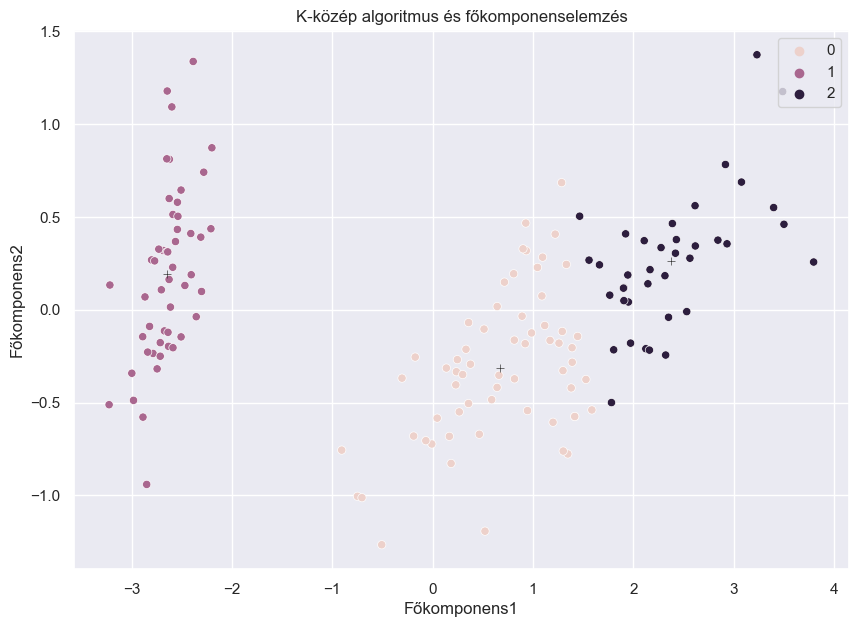

In [8]:
create_pca_frame = lambda pcd: pd.DataFrame(pcd, columns = [str(x) for x in range(pcd.shape[1])])
pca_frame = create_pca_frame(pca_data)
pca_frame['pred'] = pd.Series(y_pred)  
centers = kmeans.cluster_centers_
pca_centers = pd.DataFrame(pca.transform(centers), columns=['0','1'])

plt.figure(figsize=(10,7))
plt.title('K-közép algoritmus és főkomponenselemzés')
ax = scatter(x='0', y='1', hue='pred', data=pca_frame)
ax = scatter(x='0', y='1', color=".2", marker="+", data=pca_centers)
ax.tick_params()
ax.legend(loc='upper right')
ax.set_xlabel('Főkomponens1')
ax.set_ylabel('Főkomponens2')
plt.show()

In [9]:
tsne = TSNE(n_components=var_ratio)
tsne_data = tsne.fit_transform(X)

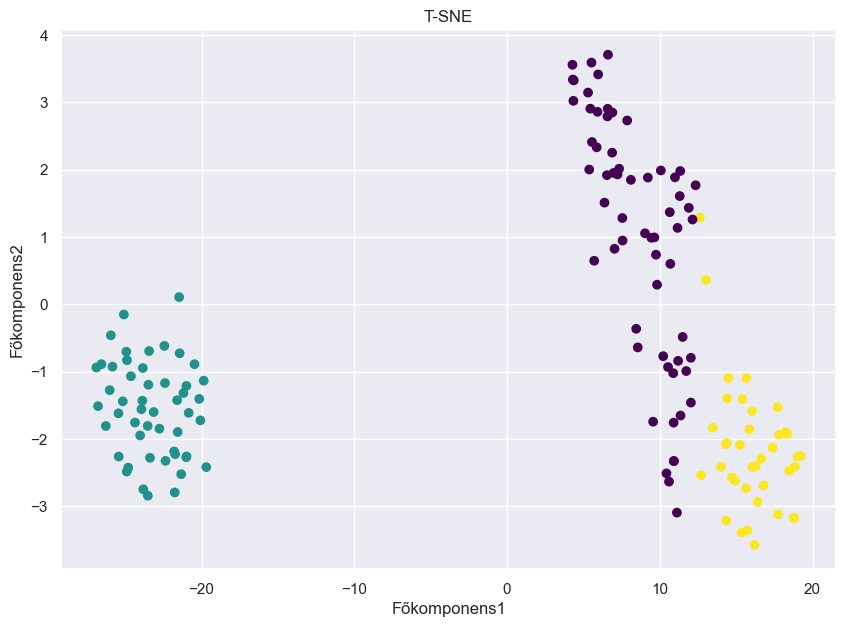

In [10]:
plt.figure(figsize=(10, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=kmeans.labels_,cmap='viridis')
plt.title('T-SNE')
plt.xlabel('Főkomponens1')
plt.ylabel('Főkomponens2')
plt.show()

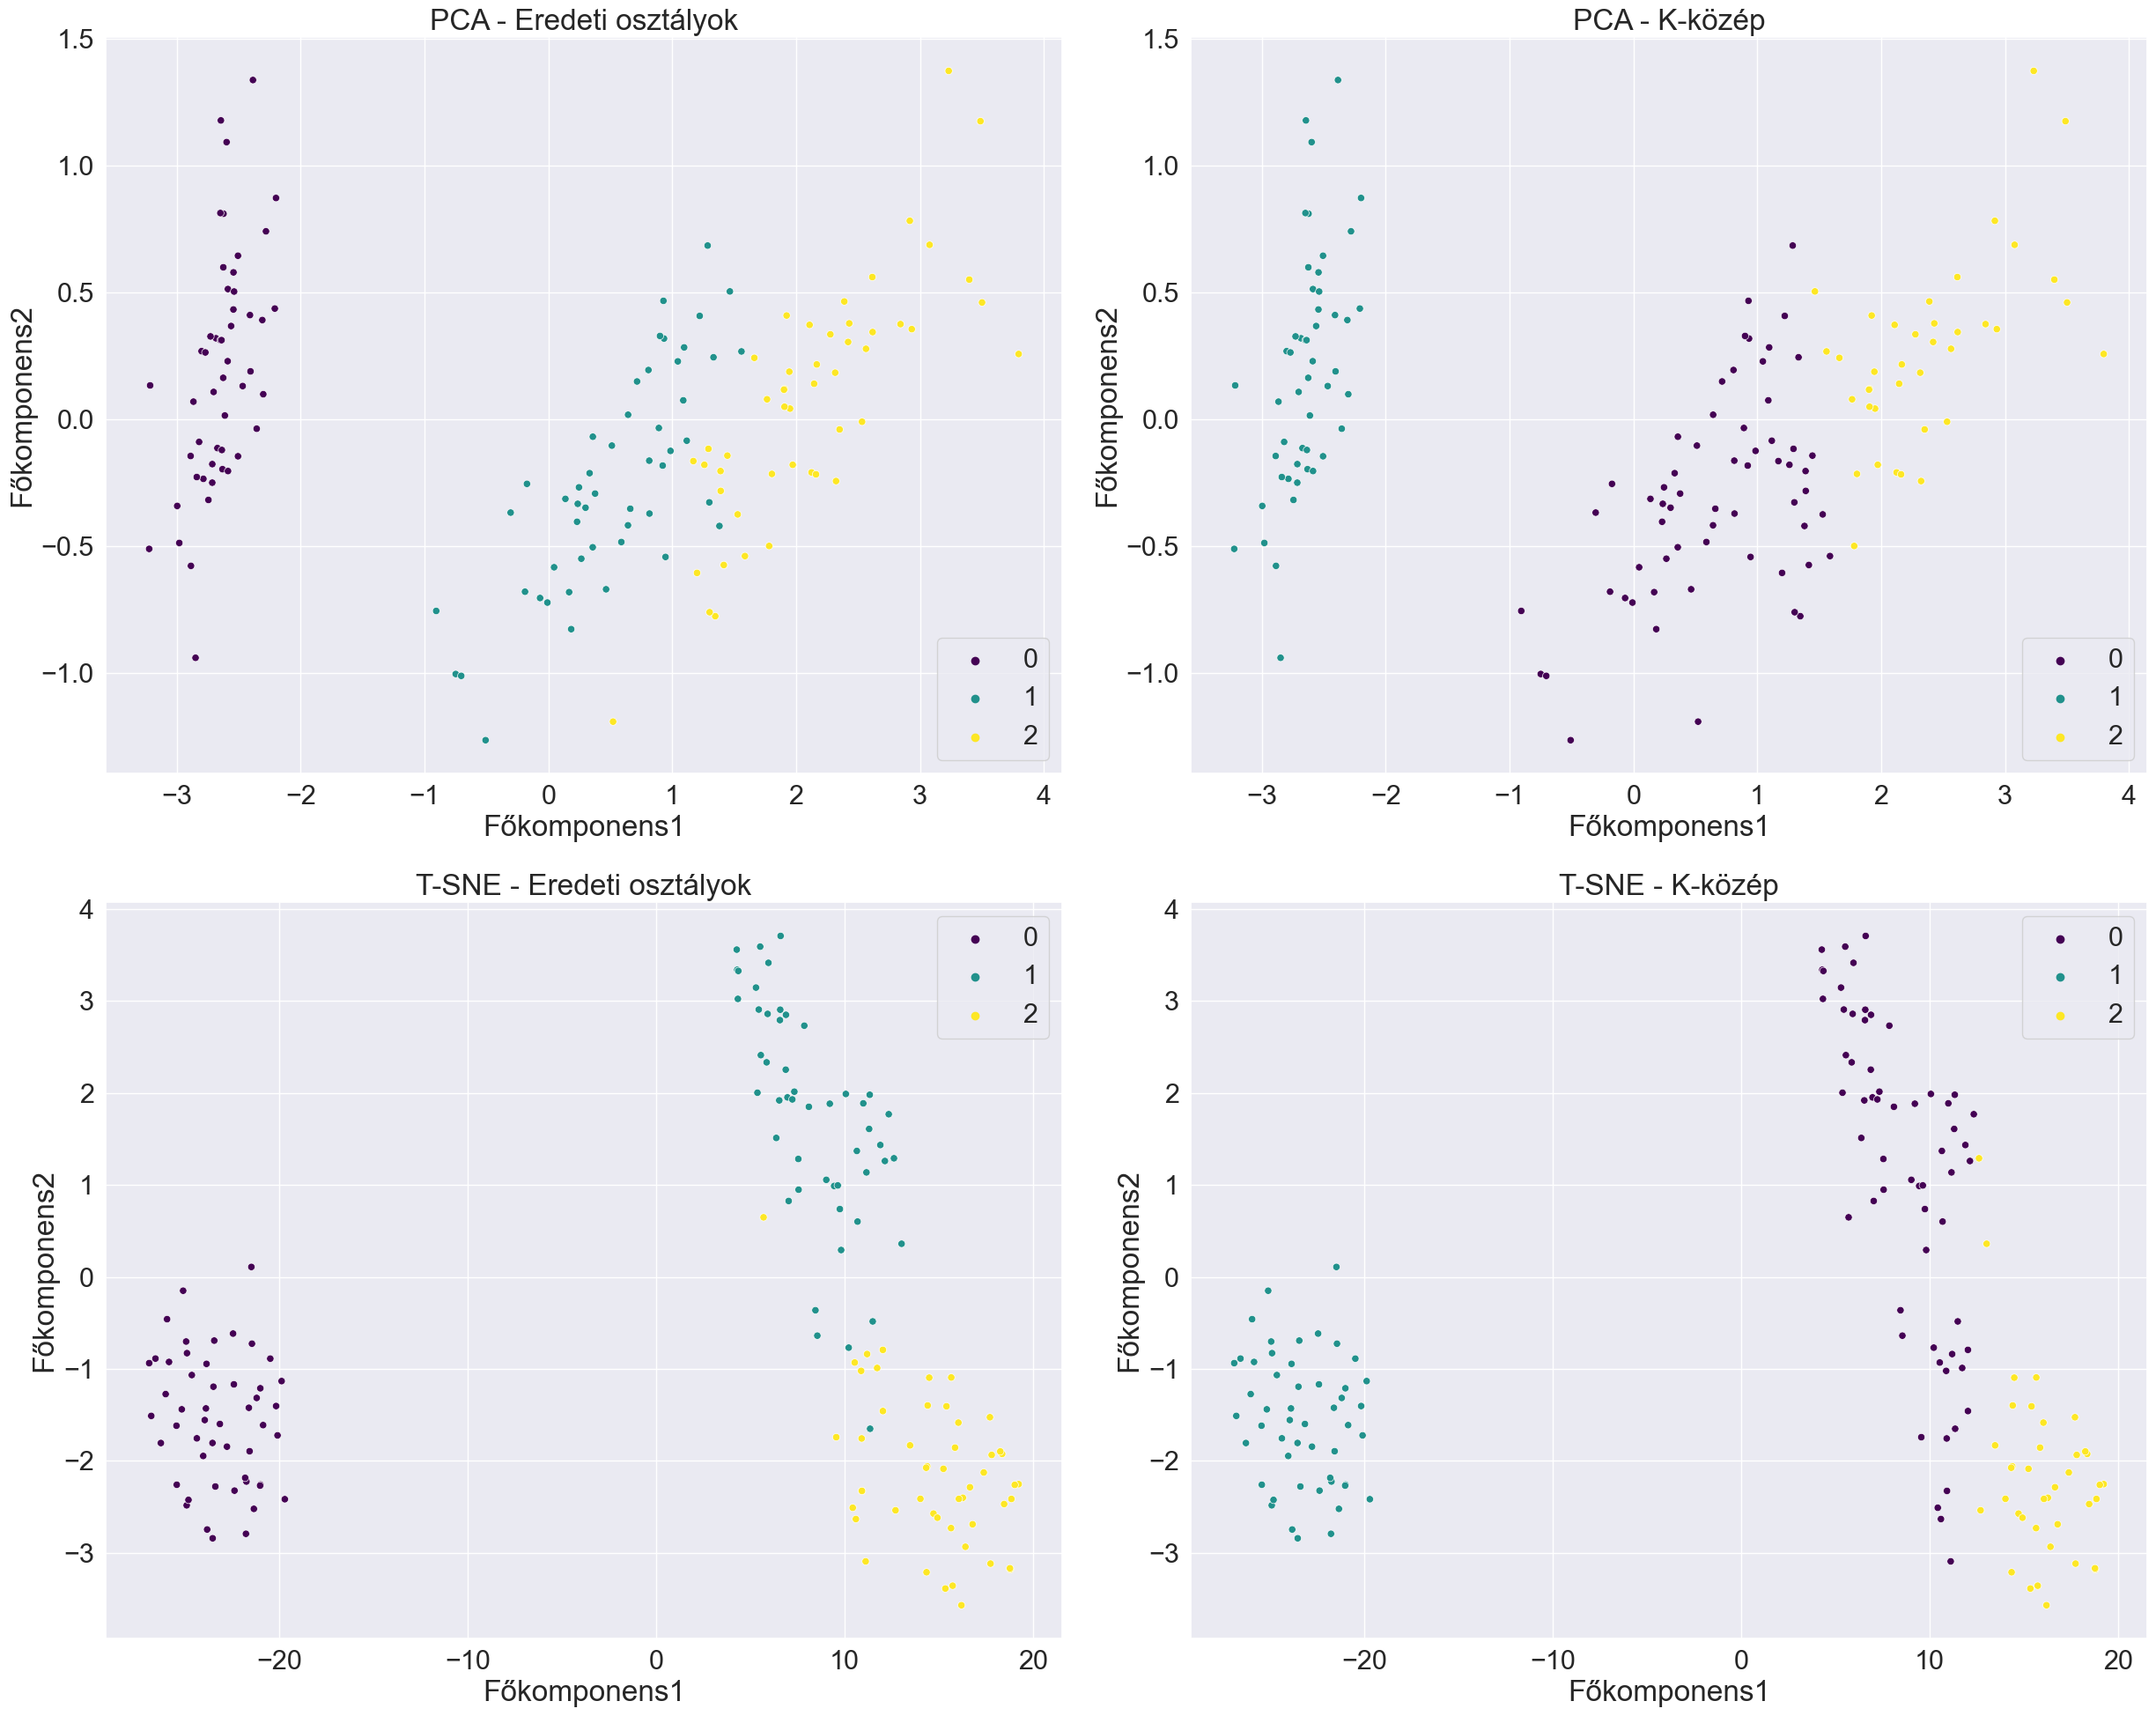

In [11]:
sns.set(font_scale=2)
plt.figure(figsize=(25, 20))

plt.subplot(2, 2, 1)
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1],hue=iris.target, palette='viridis')
plt.title('PCA - Eredeti osztályok')
plt.xlabel('Főkomponens1')
plt.ylabel('Főkomponens2')

plt.subplot(2, 2, 2)
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans.labels_, palette='viridis')
plt.title('PCA - K-közép')
plt.xlabel('Főkomponens1')
plt.ylabel('Főkomponens2')

plt.subplot(2, 2, 3)
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=iris.target,palette='viridis')
plt.title('T-SNE - Eredeti osztályok')
plt.xlabel('Főkomponens1')
plt.ylabel('Főkomponens2')

plt.subplot(2, 2, 4)
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=kmeans.labels_, palette='viridis')
plt.title('T-SNE - K-közép')
plt.xlabel('Főkomponens1')
plt.ylabel('Főkomponens2')

plt.tight_layout()
plt.show()

A k-közép klaszterezéshez megkellett határoznia kluszter számot ehezz a könyök modszer és a sziluett módszert használtam. Ezután alkalmaztam a k-közép klaszterezést. Ez után dimenzio csökkentést végeztem el PCA és T-SNE módszerekkel és az eredményeket megjelenitettem diagrammokban. Végeül összehasonlitóttam a PCA t-SNE k-Közép és az eredeti adatokat.